<a href="https://colab.research.google.com/github/RajkumarGalaxy/ComputerVision/blob/master/LayoutParser_layout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LayoutParser

A Python library for Document Image Analysis (DIA)

References:

Official Notebook
https://github.com/Layout-Parser/layout-parser/blob/master/examples/Deep%20Layout%20Parsing.ipynb


Github repo
https://github.com/Layout-Parser/layout-parser

Research paper
https://arxiv.org/abs/2103.15348
https://arxiv.org/pdf/2103.15348.pdf


Dataset
https://arxiv.org/abs/2004.08686



install LayoutParser library from PyPi package. Install other dependencies.

In [1]:
%%bash
pip install -U layoutparser
pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' 
pip install layoutparser[ocr]      


  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-ybp3kygp/detectron2
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=5034368 sha256=ca656711fb413e572e173cd6158580dc63e9bc12a1f06b4e91da9ae7c716ae24
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ubnvbsz/wheels/24/b4/77/2e5f8651761d4b6bd53b5e024a97583d9b043636c0c077ad4d
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=ef335826c9899bc999e3feb263a3a78e023435735c2780fd9aac297ce733abee
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
Successfully built detectron2 fvcore
  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=35365635bf5c722ebf08237d6ba1e6175b7f7f22b6be03dee3fb9cf6abefeb

  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-ybp3kygp/detectron2
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1


Import the libraries

In [29]:
import layoutparser as lp
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cv2

Clone the source files for example data

In [11]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1023, done.
remote: Counting objects: 100% (529/529), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 1023 (delta 301), reused 420 (delta 209), pack-reused 494
Receiving objects: 100% (1023/1023), 62.01 MiB | 33.32 MiB/s, done.
Resolving deltas: 100% (530/530), done.


Change directory to read the example data

In [16]:
%cd /content/layout-parser/examples/data/
!ls -p

/content/layout-parser/examples/data
example-table.jpeg  paper-image.jpg


Read an image from the source files to infer on it

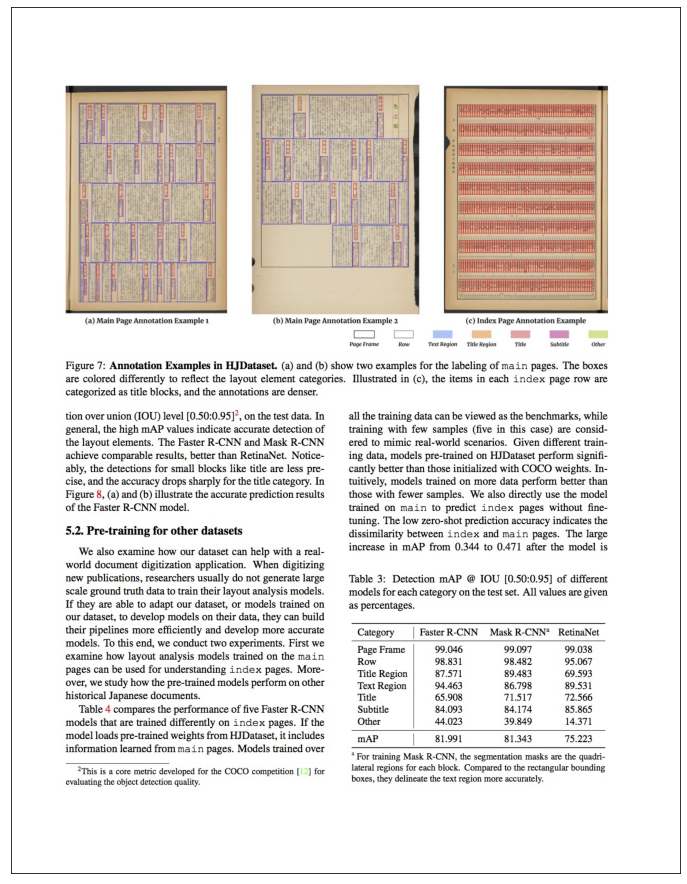

In [36]:
img = cv2.imread("/content/layout-parser/examples/data/paper-image.jpg")
# convert BGR image into RGB format
image = img[..., ::-1]
# display image
plt.figure(figsize=(12,16))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Load a pre-trained Detectron2 model configured for Layout Parsing

In [21]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', 
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

Infer the layouts for the sample image using the pre-trained model

In [32]:
layout = model.detect(image)

Display the image with infered layouts on it

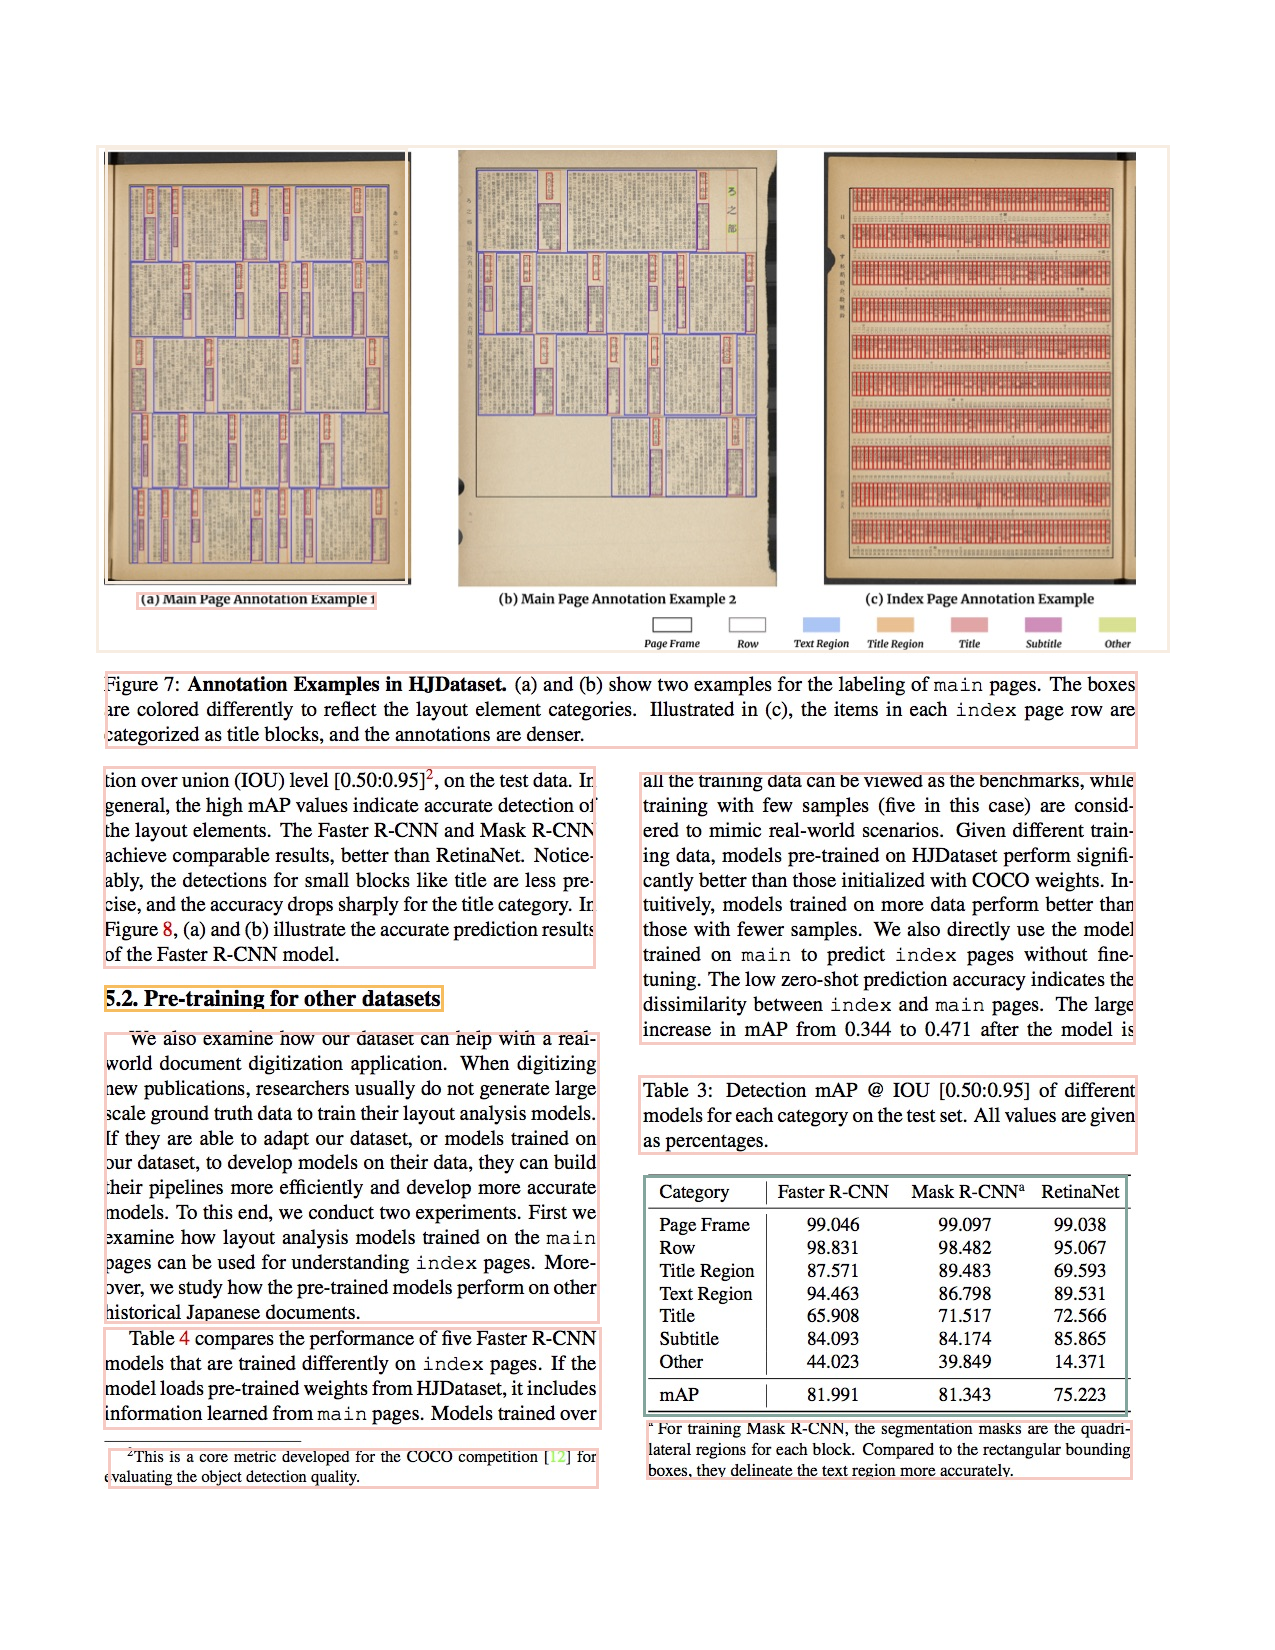

<Figure size 864x1152 with 0 Axes>

In [33]:
lp.draw_box(image, layout, box_width=3)

Thank you for your time!